# Curvaturas

## Librerias

In [1]:
import sympy as sp
from sympy import lambdify
import matplotlib.pyplot as plt
import numpy as np

Se realizara el siguiente ejercicio con 

$$\alpha(s) = (a cos(\frac{s}{c}),a sin(\frac{bs}{c}), \frac{bs}{c} ) $$
 
Teniendo en cuenta que:

$$a^{2} + b^{2} = c^{2}$$

In [2]:
# Primero volvemos simbolos los siguientes parametros:
a,b,c = sp.symbols("a,b,c", positive = True, real = True)
s = sp.symbols("s")
x,y,z,alpha,dalpha,ddalpha,T,N,B,k,t = sp.symbols("s,y,z,alpha,dalpha,ddalpha,T,N,B,k,t", cls = sp.Function)
da_norma = sp.symbols ("da_norma", cls = sp.Function)

In [3]:
#Definimos las componentes de alpha
x = a*sp.cos(s/c)
y = a*sp.sin(s/c)
z = b*s/c
alpha = (x,y,z)
print('alpha(s) = ',alpha)
print('norma = ', sp.sqrt(np.dot(alpha,alpha)).simplify())

alpha(s) =  (a*cos(s/c), a*sin(s/c), b*s/c)
norma =  sqrt(a**2*c**2 + b**2*s**2)/c


Realizaremos una funcion en donde obtengamos al norma de una componente.

In [5]:
def norma(x):
  return sp.sqrt(np.dot(x,x)).simplify()

### Visualizaremos a X
Tomaremos los siguientes datos para los siguientes parametros: a = 3 y c = 5. Tambien realizaremos una grafica.

In [6]:
x.subs(a,3).subs(c,5)

3*cos(s/5)

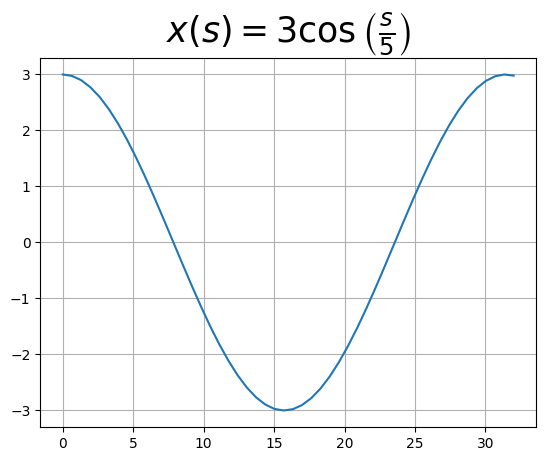

In [7]:
t = np.linspace(0,32)
X = lambdify(s,x.subs(a,3).subs(c,5))(t)
plt.plot(t,X)
plt.title(r"$x(s)=3\cos\left(\frac{s}{5}\right)$", size=25)
plt.grid(True)
plt.show()

### Viazualizacion de la parametrización.
Tomaremos los siguientes datos para los siguientes parametros: a = 3, b = 4 y c = 5. Tambien realizaremos una grafica.

In [8]:
t = np.linspace(-50,50,200)
X = lambdify(s,x.subs(a,3).subs(c,5))(t)
Y = lambdify(s,y.subs(a,3).subs(c,5))(t)
Z = lambdify(s,z.subs(b,4).subs(c,5))(t)

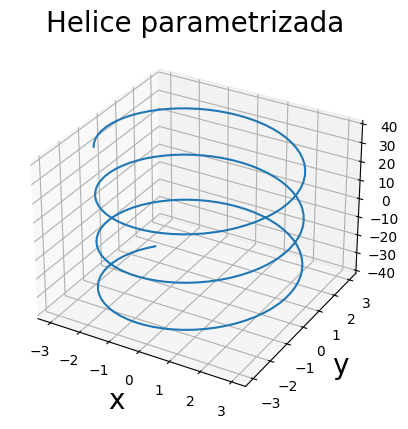

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

ax.set_title("Helice parametrizada", size=20)
ax.plot(X,Y,Z)

ax.set_xlabel("x", size = 20)
ax.set_ylabel("y", size = 20)

plt.show()

Podemos realizar la visualización utilizando ploty.express

In [10]:
import  plotly.express as px
fig = px.line_3d(x=X, y=Y,z=Z, title="Helice parametrizada")
fig.show()

### Vector Tangente

In [11]:
dalpha = (sp.diff(x,s), sp.diff(y,s), sp.diff(z,s))
print(r'\hat{T} =', dalpha)

\hat{T} = (-a*sin(s/c)/c, a*cos(s/c)/c, b/c)


### Norma del vector tangente

In [12]:
dal_norma = sp.sqrt(np.dot(dalpha,dalpha)).simplify()
print("norma del vector tangente",dal_norma)
print(dal_norma.subs(c**2,a**2 + b**2))

norma del vector tangente sqrt(a**2 + b**2)/c
1


### Vector Tangente Unitario

In [13]:
T = (sp.diff(x,s), sp.diff(y,s), sp.diff(z,s))
T

(-a*sin(s/c)/c, a*cos(s/c)/c, b/c)

### Norma del vector tangente unitario

In [14]:
norma(T).simplify().subs(c**2,a**2+b**2)

1

### Segunda Derivada de la curva

In [15]:
ddal = (sp.diff(x,s,2), sp.diff(y,s,2), sp.diff(z,s,2))
print("segunda derivada de la curva",ddal)

segunda derivada de la curva (-a*cos(s/c)/c**2, -a*sin(s/c)/c**2, 0)


### Calculo de la curva

$$K(s) = |\alpha''|$$

In [17]:
k = norma(ddal)
k

a/c**2

In [18]:
k.subs(a,3).subs(b,4).subs(c,5)

3/25

### Vector Normal Unitario

$$\hat{N} = \frac{\alpha''(s)}{K(s)}$$

In [19]:
N = (sp.diff(x,s,2)/k, sp.diff(y,s,2)/k, sp.diff(z,s,2)/k)
print('Vector Normal:', N)

Vector Normal: (-cos(s/c), -sin(s/c), 0)


In [20]:
## Se verifica que la norma siga siendo 1
norma(N)

1

### Vector Binomial

$$\hat{B} = \hat{T} \times \hat{N}$$

In [21]:
B = np.cross(T,N)
B = (B[0].simplify(), B[1].simplify(), B[2].simplify())
B

(b*sin(s/c)/c, -b*cos(s/c)/c, a/c)

In [23]:
## Se verifica que la norma siga siendo 1
norma(B).subs(c**2,a**2+b**2)

1

### Derivada del vector binomial

In [24]:
dB = (sp.diff(B[0], s), sp.diff(B[1], s), sp.diff(B[2],s))
print("derivada del vector binomial",dB)

derivada del vector binomial (b*cos(s/c)/c**2, b*sin(s/c)/c**2, 0)


### Calculo la torción

$$\hat{\tau} = |\hat{B}'|$$

In [25]:
#Torsion
tao = sp.sqrt(np.dot(dB, dB)).simplify().subs(c**2, a**2 + b**2)
print("Torsion",tao)
print(tao.subs(a,3).subs(b,4))

Torsion b/(a**2 + b**2)
4/25
